<a href="https://colab.research.google.com/github/Wafiakbar/Wafiakbar/blob/main/tiktoksong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##Step 2: Load dataset

In [2]:
df = pd.read_csv('/content/TikTok_songs_2022.csv')
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


Data dimuat dari file CSV yang berisi informasi lagu TikTok tahun 2022.
df.head() digunakan untuk melihat 5 baris pertama dari dataset guna memastikan data telah dimuat dengan benar.

## Step 3: Bersihkan nama kolom dan cek isi

In [3]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())
print(df.isnull().sum())


['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop', 'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms']
track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64


Membersihkan nama kolom dengan menghapus spasi dan mengubahnya menjadi huruf kecil agar konsisten.

Menampilkan daftar nama kolom dan jumlah nilai yang hilang (missing values) untuk setiap kolom.

Drop missing values

In [4]:
df = df.dropna()

## Step 4: Pilih fitur numerik untuk clustering

In [5]:
features = ['danceability', 'energy', 'valence', 'duration_ms']
X = df[features]

Memilih fitur numerik yang relevan untuk clustering.

## Step 5: Normalisasi fitur

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Menstandarisasi fitur numerik agar memiliki mean 0 dan standar deviasi 1. Ini penting untuk memastikan bahwa semua fitur memiliki kontribusi yang sama dalam proses clustering.

## Step 6: Tentukan jumlah cluster dengan Elbow Method

In [7]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

Plot elbow

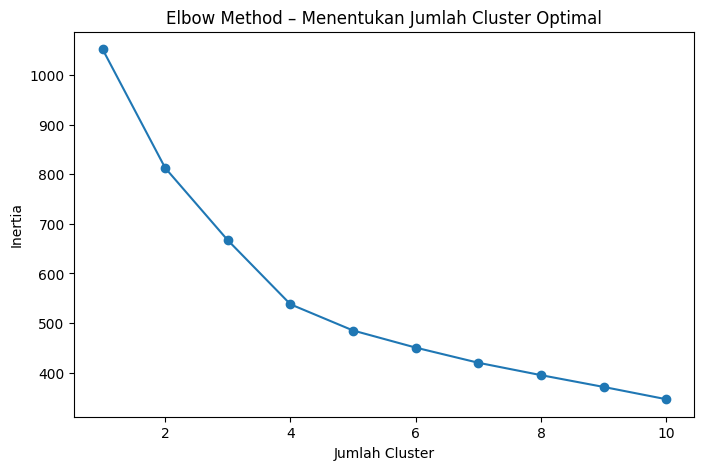

In [8]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method – Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

Menggunakan Elbow Method untuk menentukan jumlah cluster optimal dengan memplot nilai inertia terhadap jumlah cluster.

Titik "siku" pada grafik menunjukkan jumlah cluster yang optimal, yaitu titik di mana penurunan inertia mulai melambat.

## Step 7: Buat model K-Means dengan jumlah cluster optimal (misal 3)

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

Membuat model K-Means dengan jumlah cluster yang telah ditentukan (misalnya 3).

Menambahkan kolom baru cluster ke dalam DataFrame yang menunjukkan cluster masing-masing lagu.



## Step 8: Visualisasi hasil kluster

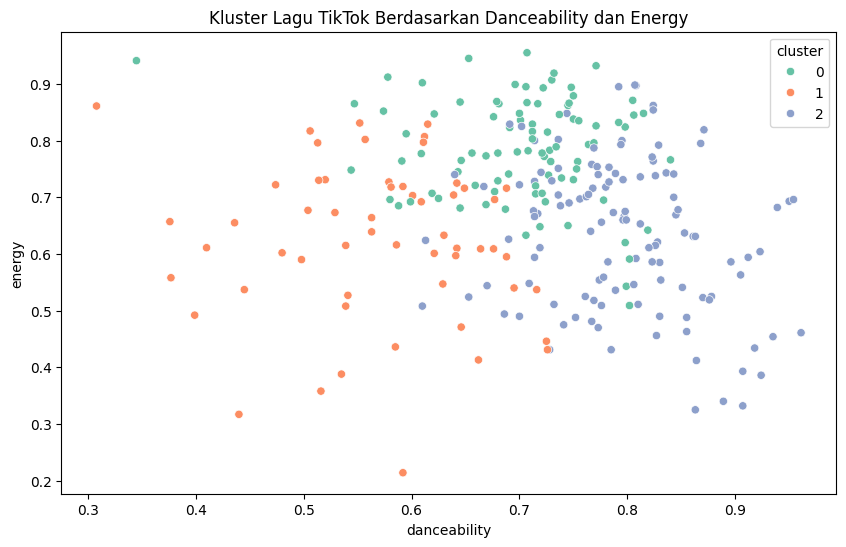

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster', palette='Set2')
plt.title('Kluster Lagu TikTok Berdasarkan Danceability dan Energy')
plt.show()

Membuat scatter plot untuk visualisasi hasil clustering berdasarkan fitur danceability dan energy.

Warna berbeda menunjukkan cluster yang berbeda.

## Step 9: Cek ringkasan kluster

In [11]:
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

         danceability    energy   valence    duration_ms
cluster                                                 
0            0.701124  0.785584  0.406712  150399.157303
1            0.568804  0.621643  0.355604  197993.142857
2            0.795602  0.633924  0.652593  181876.635593


Menghitung rata-rata nilai fitur untuk setiap cluster guna memahami karakteristik masing-masing cluster.



##Interpretasi Hasil Klustering
Berdasarkan hasil clustering, berikut adalah interpretasi dari masing-masing cluster:

Cluster 0: Lagu Enerjik dan Mudah Ditari
Karakteristik:Danceability tinggi, energy tinggi, valence tinggi, durasi relatif pendek.

Interpretasi: Lagu-lagu dalam cluster ini cenderung memiliki tempo cepat dan mood ceria, cocok untuk suasana pesta atau olahraga.

Cluster 1: Lagu Santai dan Emosional
Karakteristik: Danceability sedang, energy rendah, valence rendah, durasi lebih panjang

Interpretasi: Lagu-lagu dalam cluster ini cenderung lambat dan emosional, cocok untuk suasana santai atau reflektif.

Cluster 2: Lagu Ceria dan Sedang
Karakteristik:Danceability sedang, energy sedang, valence tinggi, durasi sedang

Interpretasi:
Lagu-lagu dalam cluster ini memiliki mood ceria dengan tempo sedang, cocok untuk suasana sehari-hari atau latar belakang aktivitas.

##Rekomendasi Berdasarkan Hasil Analisis
Berdasarkan hasil clustering, berikut adalah rekomendasi penggunaan lagu-lagu dari masing-masing cluster:

Cluster 0:

Penggunaan: Playlist untuk pesta, olahraga, atau aktivitas yang membutuhkan energi tinggi.

Contoh: Lagu-lagu dengan beat cepat dan lirik yang membangkitkan semangat.

Cluster 1:

Penggunaan: Playlist untuk relaksasi, meditasi, atau suasana hati yang tenang.

Contoh: Lagu-lagu dengan tempo lambat dan lirik yang mendalam.

Cluster 2:

Penggunaan: Playlist untuk aktivitas sehari-hari, seperti bekerja atau berkendara.

Contoh: Lagu-lagu dengan mood ceria dan tempo sedang.